In [64]:
import pandas as pd


store = pd.read_csv("store_features.csv")
products = pd.read_csv("product_attributes.csv")
train = pd.read_csv("train.csv")

#train["month"] = train["calendar_date"].split("/")[1]
train.head()

,store_id,product_key,calendar_date,on_hand_qty,total_units,total_sales,promotional_units,promotional_sales,join_quality,available_day
0,100,1,3/1/2015,71.0,1,5.97,1,5.97,BOTH,1
1,100,1,3/2/2015,65.0,6,33.85,6,33.85,BOTH,1
2,100,1,3/3/2015,61.0,4,23.88,4,23.88,BOTH,1
3,100,1,3/4/2015,57.0,4,23.88,4,23.88,BOTH,1
4,100,1,3/5/2015,52.0,5,29.85,5,29.85,BOTH,1


In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import matplotlib.dates as mdates


In [162]:
getYear = lambda x: int(x.split("/")[2])
getDate = lambda x: int(x.split("/")[1])
getMonth = lambda x: int(x.split("/")[0])
getDatetime = lambda x: datetime.datetime(int(x.split("/")[2]), int(x.split("/")[0]), int(x.split("/")[1]), 0,0,0)


train["year"] = train["calendar_date"].map(getYear)
train["date"] = train["calendar_date"].map(getDate)
train["month"] = train["calendar_date"].map(getMonth)
train["dt"] = train["calendar_date"].map(getDatetime)
train.head()

NameError: name 'x' is not defined

In [70]:
pgroups = products.groupby(["attribute1", "attribute2", "attribute3", "product_key"]).sum()
train2 = train.groupby(["calendar_date", "product_key", "store_id", "dt", "month"]).mean()
train2 = train2.reset_index()
global train2
train2.head()

,calendar_date,product_key,store_id,dt,month,on_hand_qty,total_units,total_sales,promotional_units,promotional_sales,available_day,year,date
0,1/1/2016,1,100,2016-01-01,1,128.0,9,51.66,0,0.0,1,2016,1
1,1/1/2016,1,101,2016-01-01,1,59.0,2,11.48,0,0.0,1,2016,1
2,1/1/2016,1,102,2016-01-01,1,70.0,12,68.88,0,0.0,1,2016,1
3,1/1/2016,1,103,2016-01-01,1,42.0,4,22.96,0,0.0,1,2016,1
4,1/1/2016,1,104,2016-01-01,1,70.0,15,86.10,0,0.0,1,2016,1


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import matplotlib.dates as mdates

In [75]:
july = train2[train2["month"] == 7].sort_values(by="dt")
july.head()


,calendar_date,product_key,store_id,dt,month,on_hand_qty,total_units,total_sales,promotional_units,promotional_sales,available_day,year,date
393288,7/1/2015,1,100,2015-07-01,7,83.0,9,51.16,0,0.0,1,2015,1
394342,7/1/2015,33,143,2015-07-01,7,1.0,2,29.94,0,0.0,1,2015,1
394341,7/1/2015,33,142,2015-07-01,7,9.0,3,44.91,0,0.0,1,2015,1
394340,7/1/2015,33,141,2015-07-01,7,NaN,2,29.94,0,0.0,1,2015,1
394339,7/1/2015,33,140,2015-07-01,7,0.0,6,89.82,0,0.0,1,2015,1


In [ ]:
global july

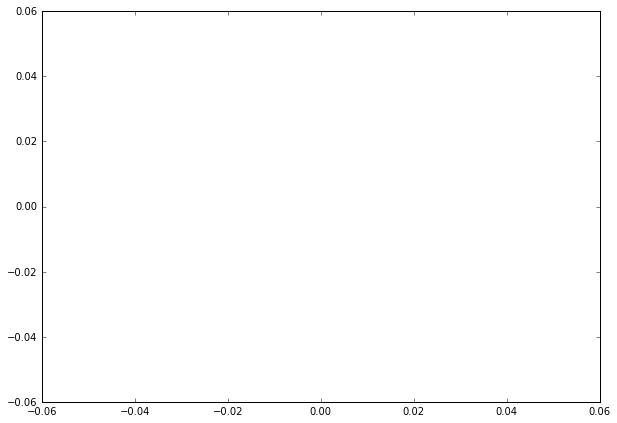

In [79]:
#pgroups
%matplotlib inline
plt.rcParams["figure.figsize"] = [10,7]
def plotProducts(pds):
    data = []
    for p in pds:
        mysales = july[(july["product_key"] == p)]
        #mysales = mysales[mysales["dt"].month == 7]
        mysales = mysales[mysales["store_id"] == 135]
        #mysales = mysales
        #mysales.index.get_level_values("calendar_date").values
        data.append(mysales)
    #print(len(data)) 
    for d in data:
        dates = d["dt"].values
        y = d["total_sales"].values
        #print("hi", dates)
        plt.plot(dates,y)
    #plt.rcParams["figure.figsize"] = [40,40]
    plt.show()
    
plotProducts([14, 41])

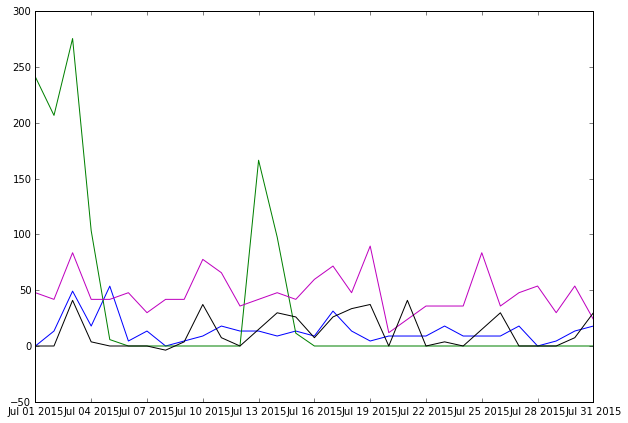

In [108]:
plotProducts([ 9,10,19, 20, 21, 22, 23])

In [89]:
train.groupby(["store_id"]).mean()[["available_day"]].sort_values(by="available_day")

,available_day
store_id,
118,0.655450
121,0.687395
138,0.728154
141,0.728363
115,0.730946
127,0.772565
134,0.794027
112,0.794307
130,0.794767


In [91]:
store.sort_values(by="size", ascending=False)

,store_id,store_type,size,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154
37,137,A,2.9063,1.4473,0.8357,-0.4742,-0.1910,-0.5224,0.5114,1.5530,...,-0.6717,-0.9301,-0.5333,-0.3607,-0.4209,-0.3381,-0.3296,-0.4766,0.8558,-0.0155
29,129,A,2.1488,0.0975,-0.0386,-1.0467,0.0618,0.0993,-0.1985,1.1389,...,-0.5764,1.3657,0.5892,-0.2753,-0.3624,-0.4762,-0.3296,-0.1981,0.6814,-0.1209
9,109,A,2.1409,-0.2093,0.0360,0.6188,-0.6967,-0.6778,-0.4351,0.7249,...,-0.7289,-0.4003,-0.1849,-0.2326,-0.3624,-0.2346,-0.8240,0.0805,-0.7138,0.6693
5,105,A,1.8736,-0.2707,0.6331,1.2954,1.0731,1.1095,0.8071,0.4948,...,0.9875,-1.1067,-0.1075,-0.4462,1.4498,-0.3036,0.6592,-0.7551,0.6923,-0.1472
15,115,A,1.7120,-0.6695,-0.4864,-0.1619,-1.4552,-1.2994,-1.5590,-0.7013,...,-0.9006,-0.4003,-0.5720,-0.4035,-0.4209,-0.3726,-0.8240,-0.4766,-0.8337,1.5252
2,102,A,1.4375,0.3429,0.5158,-0.4742,0.0618,0.7209,1.0437,-0.1033,...,0.3772,-0.7535,-0.5720,-0.4462,-0.3040,-0.2346,1.1536,-0.4766,-0.0816,-0.5818
3,103,A,1.1204,1.0178,0.4518,-0.7865,-0.4439,0.2547,0.3930,-0.6553,...,-0.4047,0.1295,-0.5333,-0.3180,-0.3040,-0.2346,0.1648,-0.4766,-0.2887,0.3532
1,101,A,0.8671,0.3429,0.9849,-0.8906,0.8203,1.3426,1.7536,-0.1953,...,0.2246,-0.5769,-0.6107,-0.4462,-0.1286,-0.4417,2.1425,-0.7551,0.8013,-1.0822
28,128,A,0.7827,0.7724,0.1000,-0.2140,0.0618,0.0604,0.1564,-0.7013,...,-0.4429,0.3061,-0.0301,1.4334,-0.1871,2.0082,-0.8240,1.4730,-0.7901,1.2750
19,119,A,0.7005,-0.0866,-0.3372,-0.9426,0.5675,-0.2504,-0.1985,0.4488,...,-0.6336,1.1891,1.6342,0.3655,-0.4209,-0.3726,-0.8240,0.6375,0.2672,1.0512


In [119]:

train["price"] = train["total_sales"]/train["total_units"]
train["sale_price"] = train["promotional_sales"]/train["promotional_units"]
train["price_diff"] = train["price"]-train["sale_price"]
train.sort_values(by="price_diff", ascending=False).head(15)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [125]:
july = train[train["month"]== 7]
july = july[july["year"] == 2015]
len(july)

47366

In [159]:
jgps = july.groupby([ "date"]).mean()
jgps = jgps.reset_index().sort_values(by="date")
jgps.head()

,date,store_id,product_key,on_hand_qty,total_units,total_sales,promotional_units,promotional_sales,available_day,year,month,price,sale_price,price_diff
0,1,121.956163,25.616900,17.005225,4.507624,23.882751,0.574333,6.834390,0.744600,2015.0,7.0,6.410047,11.899186,6.506608e-03
1,2,121.956163,25.616900,16.278903,4.799238,24.260934,0.500635,6.437789,0.756671,2015.0,7.0,6.432700,12.332343,4.273504e-04
2,3,121.956163,25.616900,13.980405,6.024142,32.714307,0.670267,8.436798,0.748412,2015.0,7.0,6.481517,12.370863,1.444193e-17
3,4,121.973463,25.624595,13.864597,3.946926,21.266434,0.447896,5.714039,0.729450,2015.0,7.0,6.513125,12.492658,-1.586033e-17
4,5,121.973463,25.624595,13.904227,4.083495,22.270621,0.497087,6.275204,0.727508,2015.0,7.0,6.533682,12.346137,0.000000e+00


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


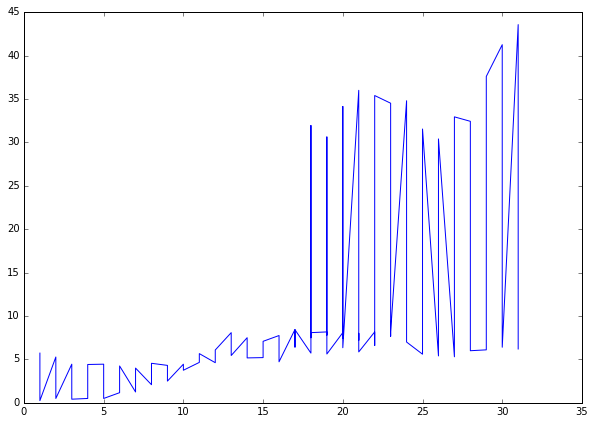

In [158]:
#pgroups
%matplotlib inline
plt.rcParams["figure.figsize"] = [10,7]
def plotProducts(pds):
    data = []
    for p in pds:
        mysales = jgps[(train2["product_key"] == p)]
        #mysales = mysales[mysales["store_id"] == 137]
        #mysales = mysales.sort_values(by="dt")
        #mysales.index.get_level_values("calendar_date").values
        data.append(mysales)
    #print(len(data)) 
    for d in data:
        #print(dates)
        x =  d["date"].values
        y = d["on_hand_qty"].values
        #print("hi", x)
        plt.plot(x,y)
    #plt.rcParams["figure.figsize"] = [40,40]
    plt.show()
    
plotProducts([3])

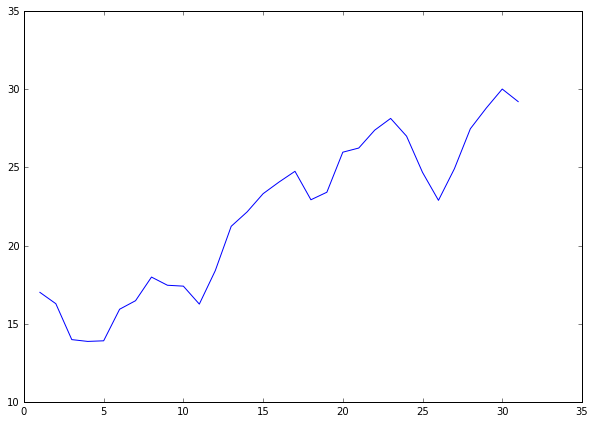

In [160]:
def plotAll():
    x =  jgps["date"].values
    y = jgps["on_hand_qty"].values
    plt.plot(x,y)
    plt.show()
    
plotAll()